# Linear Piecewise Approximation of Thrust Curves

In [1]:
# Import Nessecary Libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define Constants
max_thrust = 250

In [3]:
# Define parabolic Thrust Curve Function
def parabolic_thrust(x,max_thrust):
    scaling = np.sqrt(max_thrust)/0.75
    parabolic_bracket = (x*scaling - np.sqrt(max_thrust))
    return max(-(parabolic_bracket*parabolic_bracket) + max_thrust,0)

def constant_thrust(t, max_thrust, t_ignition=0, t_cutoff=1.5):
    if t < t_ignition:
        return max_thrust * (t / t_ignition)
    elif t_ignition <= t <= t_cutoff:
        return max_thrust
    elif t > t_cutoff:
        return 0

# Define Newton–Cotes Quadrature Function (Simpsons Rule)
def Newton_Cotes_Node(a,b,n,k):
    h = (b-a)/n
    return a + h*k

# Define Clenshaw–Curtis Quadrature Function
# https://math.stackexchange.com/questions/803915/how-to-find-chebyshev-nodes
def Clenshaw_Curtis_Node(a,b,n,k):
    return (1/2)*(a+b) + (1/2)*(b-a)*np.cos( (2*(n-k) -1)*np.pi/(2*n) )

In [4]:
# Generating Newton-Cotes and Clenshaw–Curtis Quadrature
nc_nodes = []
cc_nodes = []
for i in range(16):
    nc_nodes.append(Newton_Cotes_Node(0,1.5,15,i))
    cc_nodes.append(Clenshaw_Curtis_Node(0,1.5,15,i))
cc_nodes = np.array(cc_nodes)
nc_nodes = np.array(nc_nodes)

T_nc = np.array([parabolic_thrust(node,max_thrust) for node in nc_nodes])
T_cc = np.array([parabolic_thrust(node,max_thrust) for node in cc_nodes])

# Time Interval
t = np.arange(0,1.501,0.001)
T = np.array([parabolic_thrust(time,max_thrust) for time in t])

In [5]:
# Linear Interpolations
s_nc = np.interp(t,nc_nodes,T_nc)
s_cc = np.interp(t,cc_nodes,T_cc)

# Error Analysis
error_nc = T - s_nc
error_cc = T - s_cc

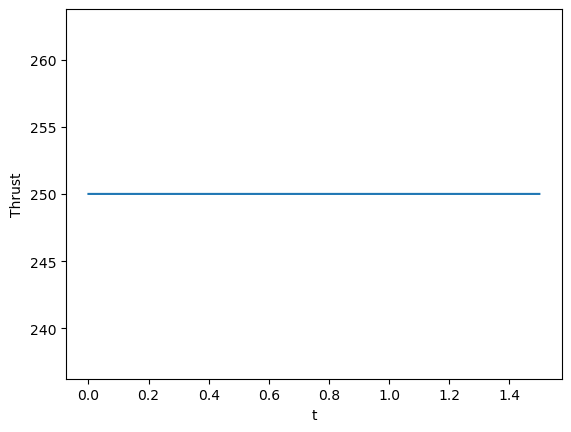

In [7]:
#Plot Constant Thrust Curve
plt.plot(t , np.array([constant_thrust(time,max_thrust) for time in t]))
plt.xlabel("t")
plt.ylabel("Thrust")

plt.show()
#plt.save("Newton_Cotes_Thrust_Curve")

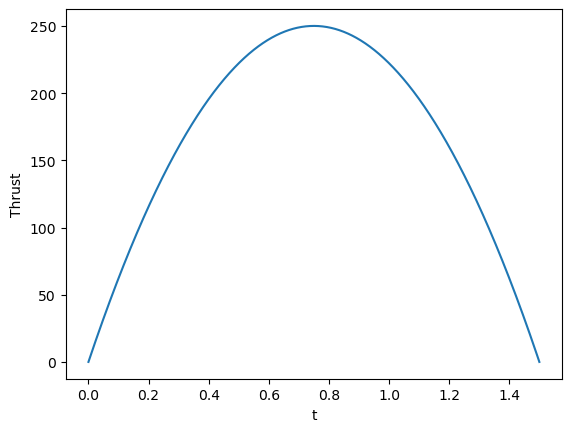

In [8]:
#Plot Thrust Curve
plt.plot(t ,T)
plt.xlabel("t")
plt.ylabel("Thrust")

plt.show()
#plt.save("Newton_Cotes_Thrust_Curve")

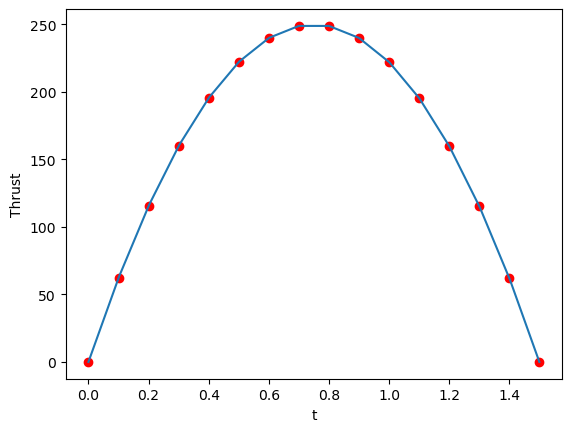

In [9]:
#Plot Newton-Cotes Interval
plt.plot(nc_nodes ,T_nc, "ro")
plt.plot(t ,s_nc)
plt.xlabel("t")
plt.ylabel("Thrust")

plt.show()
#plt.save("Newton_Cotes_Thrust_Curve")

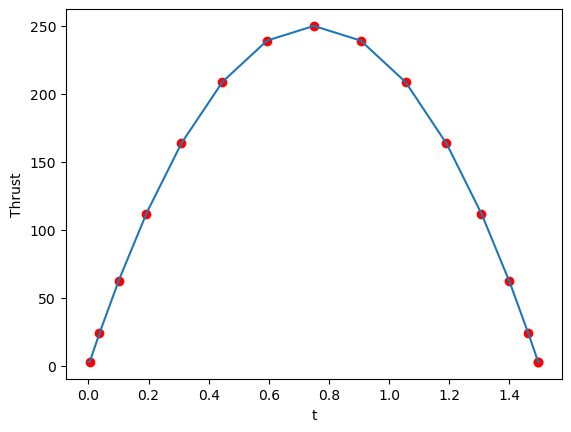

In [10]:
#Plot Clenshaw–Curtis Interval
plt.plot(cc_nodes , T_cc, "ro")
plt.plot(t ,s_cc)
plt.xlabel("t")
plt.ylabel("Thrust")

plt.show()
#plt.save()

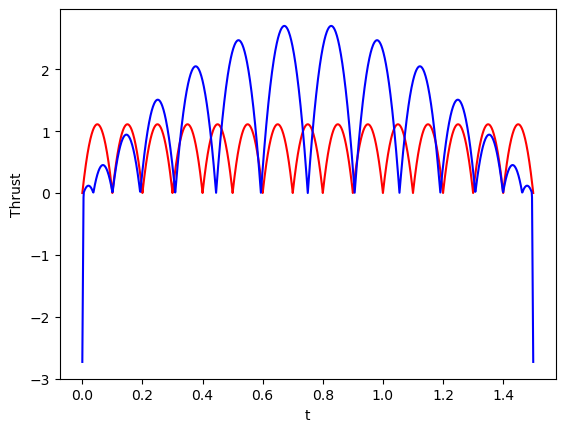

In [11]:
# Plot of Error of Newton-Cotes and Clenshaw–Curtis Quadrature
plt.plot(t ,error_nc, "r")
plt.plot(t ,error_cc, "b")
plt.xlabel("t")
plt.ylabel("Thrust")

plt.show()
#plt.save()